<H2>課題3: クラスタリング</H2>
<p>本課題で使用するデータは総務省の人口データ(http://www.stat.go.jp/data/jinsui/2016np/index.html)　を加工したものです。</p>
<p>0歳から100歳（以上）までの各年齢における総人口数、及び男女の人数が記載されています。</p>
<p>3章で学んだ内容を踏まえ、各セルに'#コメント'の内容を実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [26]:
try:
    xrange
except NameError:
    xrange = range

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

%matplotlib inline

<H2>2. データの読み込み</H2>
<p>CSVファイル"japan_number.csv"を読み込み、内容を確認します。</p>

In [27]:
# データ読み込み
dataset = pd.read_csv('japan_number.csv')

In [28]:
# データを最初の5行だけ表示
dataset.head()

,Yearsold,Total,Man,Woman
0,0,957,489,469
1,1,970,497,474
2,2,1007,514,492
3,3,1013,518,495
4,4,1041,533,507


In [29]:
# 年齢データはカテゴリ変数であり不要なため、列'Yearsold'を削除
cols = ['Total', 'Man', 'Woman']

In [30]:
# 最初の5行を表示して列が削除されたことを確認
dataset.head()

,Yearsold,Total,Man,Woman
0,0,957,489,469
1,1,970,497,474
2,2,1007,514,492
3,3,1013,518,495
4,4,1041,533,507


<H2>3. データの正規化</H2>
<p>クラスタリングはユークリッド距離に基づいて行われるため、スケールは重要です。</p>

In [39]:
cols = ['Total', 'Man', 'Woman']
dataset_for_cl = dataset[cols]

In [40]:
# 正規化を実施
scaler = MaxAbsScaler()

#dataset_for_cl_scaled = scaler.fit_transform(cols)
dataset_for_cl_scaled = scaler.fit_transform(dataset)

In [33]:
# 正規化後のデータを確認
dataset_for_cl_scaled

array([[0.        , 0.43818681, 0.46175637, 0.41688889],
       [0.01      , 0.44413919, 0.46931067, 0.42133333],
       [0.02      , 0.46108059, 0.48536355, 0.43733333],
       [0.03      , 0.46382784, 0.4891407 , 0.44      ],
       [0.04      , 0.47664835, 0.503305  , 0.45066667],
       [0.05      , 0.47802198, 0.50519358, 0.45244444],
       [0.06      , 0.48305861, 0.50991501, 0.45688889],
       [0.07      , 0.49221612, 0.51935788, 0.46666667],
       [0.08      , 0.48855311, 0.51652502, 0.46222222],
       [0.09      , 0.48489011, 0.51180359, 0.45955556],
       [0.1       , 0.48580586, 0.51274788, 0.46044444],
       [0.11      , 0.50320513, 0.53068933, 0.47733333],
       [0.12      , 0.51236264, 0.54107649, 0.48444444],
       [0.13      , 0.52747253, 0.55807365, 0.49955556],
       [0.14      , 0.53525641, 0.56562795, 0.50577778],
       [0.15      , 0.54761905, 0.58073654, 0.51555556],
       [0.16      , 0.54807692, 0.58073654, 0.51733333],
       [0.17      , 0.55631868,

In [35]:
km.fit(dataset)

cluster_labels = km.predict(dataset)

<H2> 4. データの可視化

AttributeError: Unknown property labels

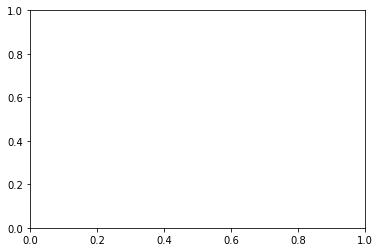

In [37]:
#colorlistあり
#グラフの描画の初期化

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colorlist = ['tomato', 'antiqewhite', 'bluevioloet', 'cornflowerblue', 'darkgreen', 'seashell', 'skybleu', 'mediumseagreen']
#クラスターの番号をゆにーくにします
cluster_ids = list(set(cluster_labels))
#cluster_idsは[0, 1, 2, 3]となっています
#クラスターごとに色を変えながら散布図に出力

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'cluster = %d' % cluster_id
    data_by_cluster = dataset[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster.iloc[:,0], data_by_cluster.iloc[:,1], c=colorlist[k], labels=label_)
    ax.set_title('clustering')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax_legend(loc='lower right')

NameError: name 'dataset' is not defined

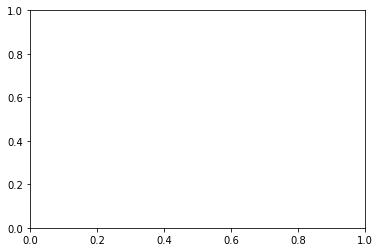

In [7]:
# 正規化したデータを散布図にPlotし、分布を確認します。
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.scatter(dataset.iloc[:,0], dataset.iloc[:,1])
ax.set_title('scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')


<H2> 5. クラスター数の決定</H2>
<p>ここではElbow Methodとシルエットプロットを用いてクラスター数を決定してみましょう。</p>

<h3>Elbow Method

In [8]:
# 最大クラスター数を10としてWCSS値を取得
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_ :
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(dataset)
    intra_sum_of_square_list.append(km.inertia_)

NameError: name 'dataset' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

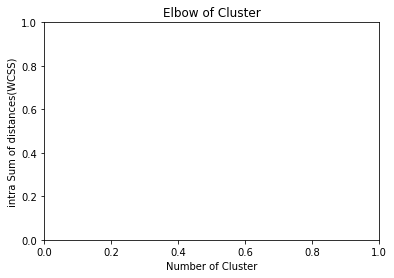

In [9]:
# 上記結果をplotにて可視化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Elbow of Cluster')
ax.set_xlabel('Number of Cluster')
ax.set_ylabel('intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

<h3>シルエットメソッド

In [10]:
# K-means法でクラスタリングの実施
n_clusters = 4
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(dataset)
cluster_labels = km.predict(dataset)
#シルエットスコアの平均を計算
silhouette_avg = silhouette_score(dataset, cluster_labels)
#それぞれのデータ点のシルエットスコアを計算する
each_silhouette_score = silhouette_samples(dataset, cluster_labels, metric='euclidean')

NameError: name 'dataset' is not defined

NameError: name 'each_silhouette_score' is not defined

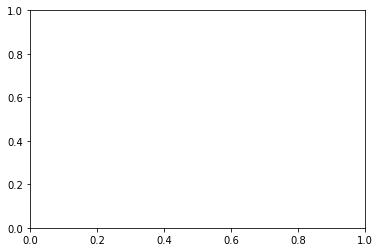

In [11]:
# シルエットスコアの平均を算出
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower = 10
for i in range(n_clusters):
    #Aggregate the silhouette scores for samples belonging to 
    #cluster i, and sort them
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 
                     0, ith_cluster_silhouette_values, 
                     facecolor=color, edgecolor=color, alpha=0.3)
    #Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    #compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
ax.set_title("silhouette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("cluster label")
#The vertical line for average silhouette score of all the values 
ax.axvline(x=silhouette_avg, color="red", linestyle = "--")
ax.set_yticks([]) #Clear the yaxis labels / ticks 
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [12]:
# それぞれのデータ点のシルエットスコアを算出する


In [13]:
#  シルエットプロットを作図
colorlist = ['tomato', 'antiquewhite', 'blueviolet', 'cornflowerblue',
             'darkgreen', 'seashell', 'skyblue', 'mediumseagreen']


<H2>6.  結果の確認

正規化後に作成したPlotをクラスターごとに色分けし、どのようにクラスターが分かれているのか確認します。

In [15]:
#　グラフの描画の初期化


#　クラスターの番号をユニークにします



#　クラスターごとに色を変えながら、散布図に出力していきます
